In [2]:
import numpy as np
from matplotlib import pyplot as plt
import sys
sys.path.append("../../Functions")
from GS_waves import select_freq_range
from abtem.waves import PlaneWave
from Column_matching import Bessel_transform
import Generate_structure
from ase.visualize.plot import plot_atoms
from ase.io import read, write
from Complex_Gaussian import(
    Gaussian_function,
    Gaussian_in_focus,
    Gaussian_fitting
)

1. Convergence test

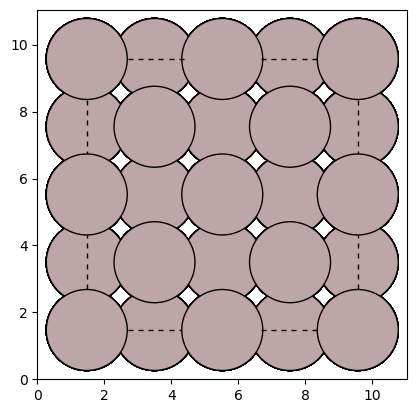

In [5]:
#Parameters to set
gmin = 0; gmax = 2; sampling = 0.0656015; energy = 300e3
a = 4.05; length = 50
#Results from isolated column
n_repeat = 2
thickness = 20
theta = np.linspace(0, 2*np.pi, 100)
cmap = plt.get_cmap("plasma")
krange = np.linspace(gmin+0.01, gmax, length)
#Generate periodic structure
structure_2 = Generate_structure.generate_periodic_fcc("Al", a, n_repeat, n_repeat, thickness)
plot_atoms(structure_2)
plt.show()

In [3]:
write("Periodic.cif", structure_2)

2. Bessel transform validation

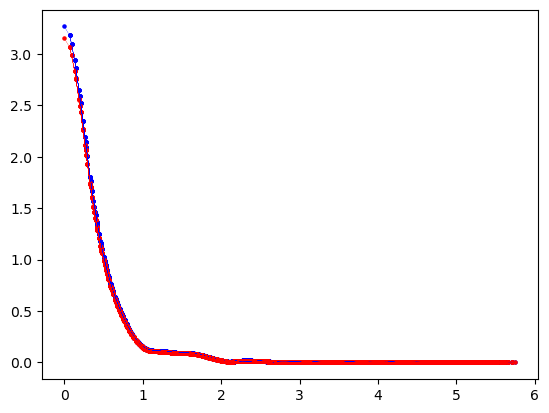

In [6]:
#Parameters to set
gmin = 0; gmax = 2; sampling = 0.0656015; energy = 300e3
a = 4.05; length = 50
#Results from isolated column
n_repeat = 2
thickness = 20
theta = np.linspace(0, 2*np.pi, 100)
cmap = plt.get_cmap("plasma")
cut_factor = 0.01
krange = np.linspace(gmin+cut_factor, gmax, length)
#Generate isolated structure
structure_1 = Generate_structure.generate_column("Al", thickness, a, (n_repeat)*a)
#    structure_1 = Generate_structure.generate_periodic_fcc("Al", a, 1, 1, thickness)
exitwave_1 = select_freq_range(np.array(PlaneWave(sampling=sampling, energy=energy).multislice(structure_1).array),
                        gmin, gmax, sampling)
exitwave_1 = exitwave_1 - 1
m, n = exitwave_1.shape
x0, y0 = np.unravel_index(np.argmax(np.abs(exitwave_1)), exitwave_1.shape)
results, components = Bessel_transform(exitwave_1, sampling, gmin+cut_factor, gmax, length, 
                                       x0=(x0-(m-1)/2)*sampling, y0=(y0-(n-1)/2)*sampling)
results1 = results; components1 = components
x = np.arange(0, m, 1) - x0; y = np.arange(0, n, 1) - y0
X, Y = np.meshgrid(x, y); R = np.sqrt(X**2 + Y**2)*sampling
plt.scatter(R.ravel(), np.abs(exitwave_1).ravel(), s=5, color='b', label="wave isolated")
plt.plot(R.ravel(), np.abs(exitwave_1).ravel(), color='b', linewidth=0.1)
plt.scatter(R.ravel(), np.abs(components).ravel(), color='r', s=5, label="j0 isolated")
plt.plot(R.ravel(), np.abs(components).ravel(), color='r', linewidth=0.1)
plt.show()

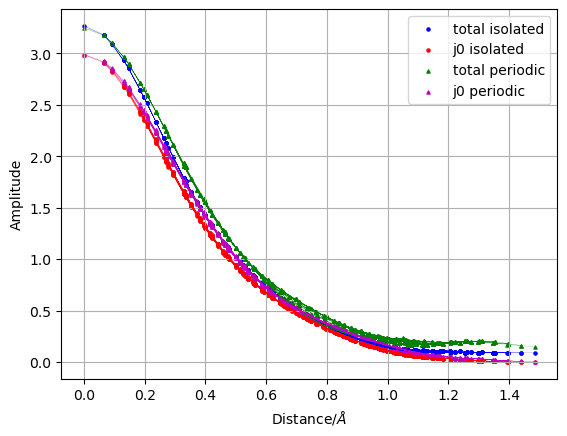

In [7]:
#Parameters to set
gmin = 0; gmax = 2; sampling = 0.0656015; energy = 300e3
a = 4.05; length = 50
#Results from isolated column
n_repeat = 2
thickness = 20
theta = np.linspace(0, 2*np.pi, 100)
cmap = plt.get_cmap("plasma")
cut_factor = 0.01
krange = np.linspace(gmin+cut_factor, gmax, length)
#Generate isolated structure
structure_1 = Generate_structure.generate_column("Al", thickness, a, a)
exitwave_1 = select_freq_range(np.array(PlaneWave(sampling=sampling, energy=energy).multislice(structure_1).array),
                        gmin, gmax, sampling)
m, n = exitwave_1.shape
exitwave_1 = exitwave_1[m//4:3*m//4, n//4:3*n//4]
#exitwave_1 = select_freq_range(exitwave_1, gmin+cut_factor, gmax, sampling)
exitwave_1 = exitwave_1 - 1
m, n = exitwave_1.shape
x0, y0 = np.unravel_index(np.argmax(np.abs(exitwave_1)), exitwave_1.shape)
results, components = Bessel_transform(exitwave_1, sampling, gmin+cut_factor, gmax, length, 
                                       x0=(x0-(m-1)/2)*sampling, y0=(y0-(n-1)/2)*sampling)
results1 = results; components1 = components
x = np.arange(0, m, 1) - x0; y = np.arange(0, n, 1) - y0
X, Y = np.meshgrid(x, y); R = np.sqrt(X**2 + Y**2)*sampling
plt.scatter(R.ravel(), np.abs(exitwave_1).ravel(), s=5, color='b', label="total isolated")
plt.plot(R.ravel(), np.abs(exitwave_1).ravel(), color='b', linewidth=0.1)
plt.scatter(R.ravel(), np.abs(components).ravel(), color='r', s=5, label="j0 isolated")
plt.plot(R.ravel(), np.abs(components).ravel(), color='r', linewidth=0.1)
#Generate periodic structure
structure_2 = Generate_structure.generate_periodic_fcc("Al", a, n_repeat, n_repeat, thickness)
exitwave_2 = select_freq_range(np.array(PlaneWave(sampling=sampling, energy=energy).multislice(structure_2).array),
                        gmin, gmax, sampling)
m, n = exitwave_2.shape
exitwave_2 = exitwave_2[(n_repeat*2-1)*m//(n_repeat*4):(n_repeat*2+1)*m//(n_repeat*4),
                        (n_repeat*2-1)*n//(n_repeat*4):(n_repeat*2+1)*n//(n_repeat*4)]
m, n = exitwave_2.shape
#exitwave_2 = select_freq_range(exitwave_2, gmin+cut_factor, gmax, sampling)
exitwave_2 = exitwave_2 - 1
x0, y0 = np.unravel_index(np.argmax(np.abs(exitwave_2)), exitwave_2.shape)
results, components = Bessel_transform(exitwave_2, sampling, gmin+cut_factor, gmax, length, 
                                       x0=(x0-(m-1)/2)*sampling, y0=(y0-(n-1)/2)*sampling)
results2 = results; components2 = components
x = np.arange(0, m, 1) - x0; y = np.arange(0, n, 1) - y0
X, Y = np.meshgrid(x, y); R = np.sqrt(X**2 + Y**2)*sampling
plt.scatter(R.ravel(), np.abs(exitwave_2).ravel(), marker='^', s=5, color='g', label="total periodic")
plt.plot(R.ravel(), np.abs(exitwave_2).ravel(), color='g', linewidth=0.1)
plt.scatter(R.ravel(), np.abs(components).ravel(), color='m', marker='^', s=5, label="j0 periodic")
plt.plot(R.ravel(), np.abs(components).ravel(), color='m', linewidth=0.1)
plt.legend()
#plt.xlim([0, 2.5])
plt.xlabel(r"Distance$/\AA$")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

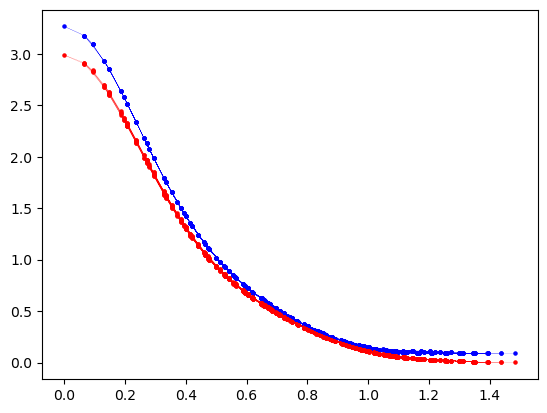

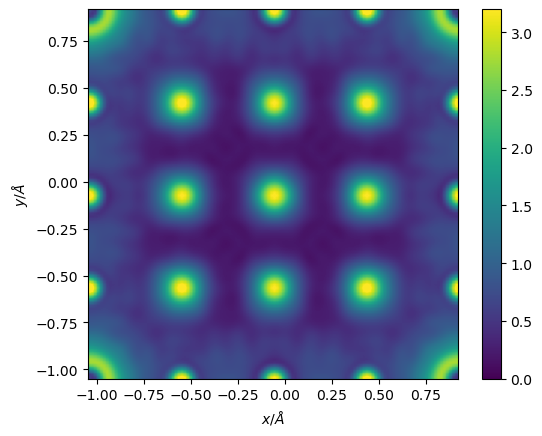

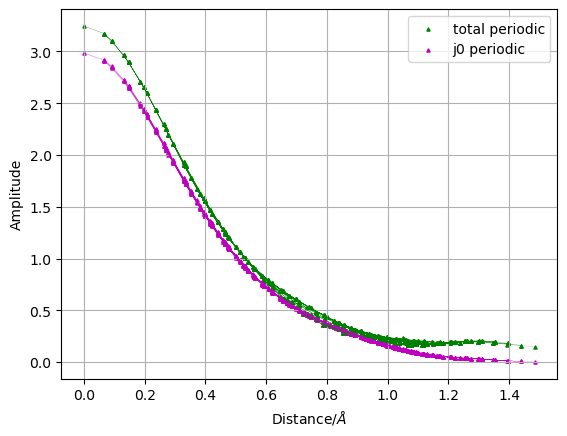

In [8]:
#Parameters to set
gmin = 0; gmax = 2; sampling = 0.0656015; energy = 300e3
a = 4.05; length = 50
#Results from isolated column
n_repeat = 2
thickness = 20
theta = np.linspace(0, 2*np.pi, 100)
cmap = plt.get_cmap("plasma")
cut_factor = 0.01
krange = np.linspace(gmin+cut_factor, gmax, length)
#Generate isolated structure
structure_1 = Generate_structure.generate_column("Al", thickness, a, a)
exitwave_1 = select_freq_range(np.array(PlaneWave(sampling=sampling, energy=energy).multislice(structure_1).array),
                        gmin, gmax, sampling)
m, n = exitwave_1.shape
exitwave_1 = exitwave_1[m//4:3*m//4, n//4:3*n//4]
#exitwave_1 = select_freq_range(exitwave_1, gmin+cut_factor, gmax, sampling)
exitwave_1 = exitwave_1 - 1
m, n = exitwave_1.shape
x0, y0 = np.unravel_index(np.argmax(np.abs(exitwave_1)), exitwave_1.shape)
results, components = Bessel_transform(exitwave_1, sampling, gmin+cut_factor, gmax, length, 
                                       x0=(x0-(m-1)/2)*sampling, y0=(y0-(n-1)/2)*sampling)
results1 = results; components1 = components
x = np.arange(0, m, 1) - x0; y = np.arange(0, n, 1) - y0
X, Y = np.meshgrid(x, y); R = np.sqrt(X**2 + Y**2)*sampling
plt.scatter(R.ravel(), np.abs(exitwave_1).ravel(), s=5, color='b', label="total isolated")
plt.plot(R.ravel(), np.abs(exitwave_1).ravel(), color='b', linewidth=0.1)
plt.scatter(R.ravel(), np.abs(components).ravel(), color='r', s=5, label="j0 isolated")
plt.plot(R.ravel(), np.abs(components).ravel(), color='r', linewidth=0.1)
plt.show()
#Generate periodic structure
structure_2 = Generate_structure.generate_periodic_fcc("Al", a, n_repeat, n_repeat, thickness)
exitwave_2 = select_freq_range(np.array(PlaneWave(sampling=sampling, energy=energy).multislice(structure_2).array),
                        gmin, gmax, sampling)
plt.imshow(np.abs(exitwave_2-1), extent=[x[0]*sampling, 
                                       x[-1]*sampling,
                                       y[0]*sampling,
                                       y[-1]*sampling],
                                       vmin=0, vmax=3.2)
plt.colorbar()
plt.xlabel(r"$x/\AA$")
plt.ylabel(r"$y/\AA$")
plt.show()
m, n = exitwave_2.shape
exitwave_2 = exitwave_2[(n_repeat*2-1)*m//(n_repeat*4):(n_repeat*2+1)*m//(n_repeat*4),
                        (n_repeat*2-1)*n//(n_repeat*4):(n_repeat*2+1)*n//(n_repeat*4)]
m, n = exitwave_2.shape
#exitwave_2 = select_freq_range(exitwave_2, gmin+cut_factor, gmax, sampling)
exitwave_2 = exitwave_2 - 1
x0, y0 = np.unravel_index(np.argmax(np.abs(exitwave_2)), exitwave_2.shape)
results, components = Bessel_transform(exitwave_2, sampling, gmin+cut_factor, gmax, length, 
                                       x0=(x0-(m-1)/2)*sampling, y0=(y0-(n-1)/2)*sampling)
results2 = results; components2 = components
x = np.arange(0, m, 1) - x0; y = np.arange(0, n, 1) - y0
X, Y = np.meshgrid(x, y); R = np.sqrt(X**2 + Y**2)*sampling
plt.scatter(R.ravel(), np.abs(exitwave_2).ravel(), marker='^', s=5, color='g', label="total periodic")
plt.plot(R.ravel(), np.abs(exitwave_2).ravel(), color='g', linewidth=0.1)
plt.scatter(R.ravel(), np.abs(components).ravel(), color='m', marker='^', s=5, label="j0 periodic")
plt.plot(R.ravel(), np.abs(components).ravel(), color='m', linewidth=0.1)
plt.legend()
#plt.xlim([0, 2.5])
plt.xlabel(r"Distance$/\AA$")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

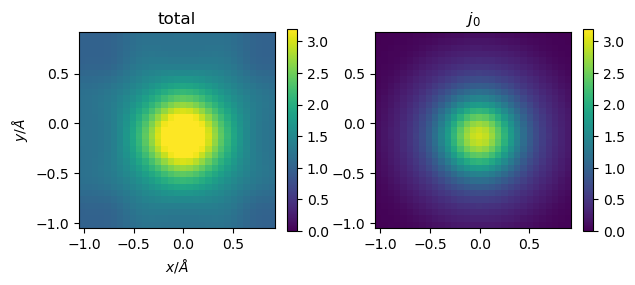

In [9]:
plt.subplot(1, 2, 1)
plt.imshow(np.abs(exitwave_2-1), extent=[x[0]*sampling, 
                                       x[-1]*sampling,
                                       y[0]*sampling,
                                       y[-1]*sampling],
                                       vmin=0, vmax=3.2)
plt.colorbar(shrink=0.45)
plt.title("total")
plt.xlabel("$x/\AA$")
plt.ylabel("$y/\AA$")
plt.subplot(1, 2, 2)
plt.imshow(np.abs(components2), extent=[x[0]*sampling, 
                                       x[-1]*sampling,
                                       y[0]*sampling,
                                       y[-1]*sampling],
                                       vmin=0, vmax=3.2)
plt.colorbar(shrink=0.45)
plt.title(r"$j_0$")
#plt.xlabel("$x/\AA$")
#plt.ylabel("$y/\AA$")
plt.tight_layout()
plt.show()

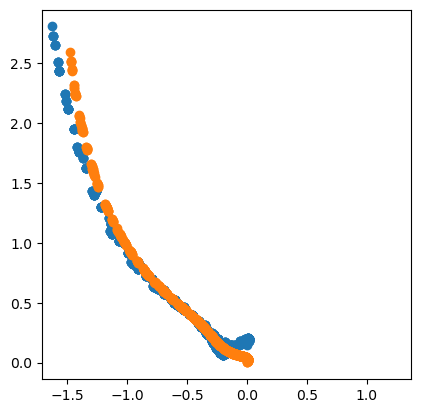

In [10]:
plt.scatter(np.real(exitwave_2), np.imag(exitwave_2))
plt.scatter(np.real(components2), np.imag(components2))
plt.axis("square")
plt.show()

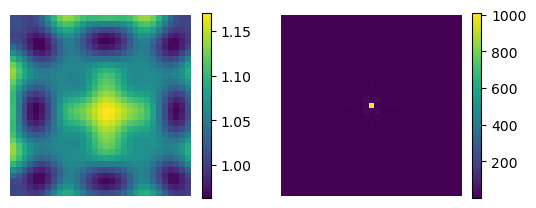

In [11]:
residue = exitwave_2 - 1 - components2
plt.subplot(1, 2, 1)
plt.imshow(np.abs(residue))
plt.axis("off")
plt.colorbar(shrink=0.5)
plt.subplot(1, 2, 2)
plt.imshow(np.abs(np.fft.fftshift(np.fft.fft2(residue))))
plt.axis("off")
plt.colorbar(shrink=0.5)
plt.show()

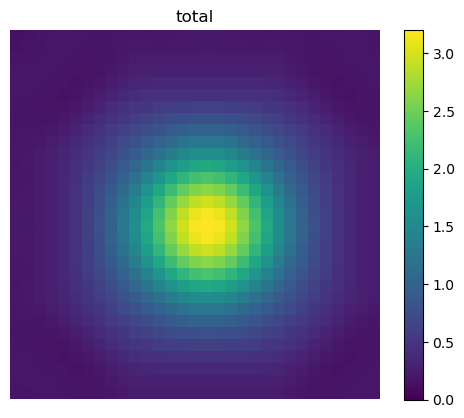

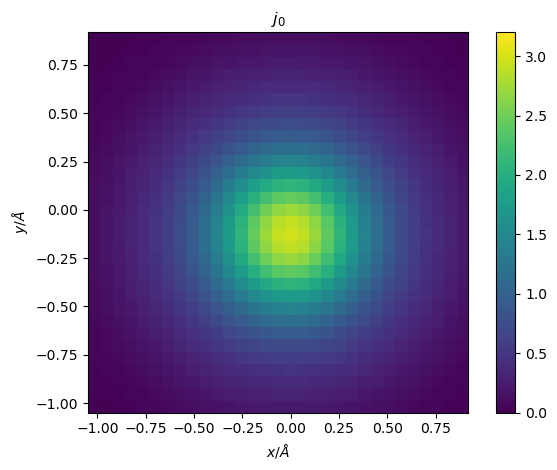

In [12]:
#plt.subplot(2, 1, 1)
plt.imshow(np.abs(exitwave_2), extent=[x[0]*sampling, 
                                       x[-1]*sampling,
                                       y[0]*sampling,
                                       y[-1]*sampling],
                                       vmin=0, vmax=3.2)
plt.colorbar()
plt.title("total")
plt.axis("off")
#plt.xlabel("$x/\AA$")
#plt.ylabel("$y/\AA$")
plt.show()
#plt.subplot(2, 1, 2)
plt.imshow(np.abs(components2), extent=[x[0]*sampling, 
                                       x[-1]*sampling,
                                       y[0]*sampling,
                                       y[-1]*sampling],
                                       vmin=0, vmax=3.2)
plt.colorbar()
plt.title(r"$j_0$")
plt.xlabel("$x/\AA$")
plt.ylabel("$y/\AA$")
plt.tight_layout()
plt.show()

3. Neighboring validation

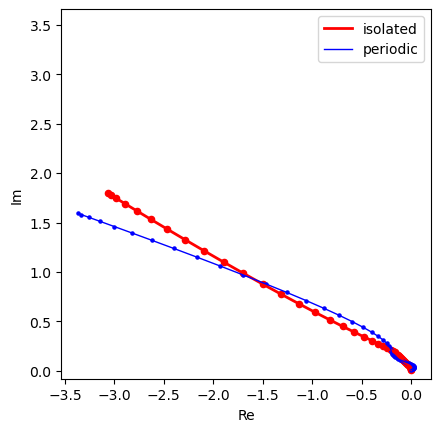

In [250]:
#Parameters to set
gmin = 0; gmax = 2; sampling = 0.0656015; energy = 300e3
a = 4.05; length = 50
#Results from isolated column
n_repeat = 2
thickness = 30
theta = np.linspace(0, 2*np.pi, 100)
cmap = plt.get_cmap("plasma")
krange = np.linspace(gmin+0.01, gmax, length)
structure_1 = Generate_structure.generate_column("Al", thickness, a, (n_repeat)*a)
#    structure_1 = Generate_structure.generate_periodic_fcc("Al", a, 1, 1, thickness)
exitwave_1 = select_freq_range(np.array(PlaneWave(sampling=sampling, energy=energy).multislice(structure_1).array),
                        gmin, gmax, sampling)
m, n = exitwave_1.shape
exitwave_1 = exitwave_1[(n_repeat*2-1)*m//(n_repeat*4):(n_repeat*2+1)*m//(n_repeat*4),
                        (n_repeat*2-1)*n//(n_repeat*4):(n_repeat*2+1)*n//(n_repeat*4)]
results, components = Bessel_transform(exitwave_1-1, sampling, gmin+0.01, gmax, length, 
                                       x0=(x0-(m-1)/2)*sampling, y0=(y0-(n-1)/2)*sampling)
x = np.arange(0, m, 1) - x0; y = np.arange(0, n, 1) - y0
x0, y0 = np.unravel_index(np.argmax(np.abs(exitwave_1)), exitwave_1.shape)
results1, components1 = Bessel_transform(exitwave_1-1, sampling, gmin+0.01, gmax, length, x0=sampling/2, y0=sampling/2)
#structure_2 = Generate_structure.generate_column("Al", thickness, a, a)
structure_2 = Generate_structure.generate_periodic_fcc("Al", a, n_repeat, n_repeat, thickness)
exitwave_2 = select_freq_range(np.array(PlaneWave(sampling=sampling, energy=energy).multislice(structure_2).array),
                        gmin, gmax, sampling)
m, n = exitwave_2.shape
exitwave_2 = exitwave_2[(n_repeat*2-1)*m//(n_repeat*4):(n_repeat*2+1)*m//(n_repeat*4),
                        (n_repeat*2-1)*n//(n_repeat*4):(n_repeat*2+1)*n//(n_repeat*4)]
results2, components2 = Bessel_transform(exitwave_2-1, sampling, gmin+0.01, gmax, length, x0=sampling/2, y0=sampling/2)
plt.plot(np.real(results1), np.imag(results1), color='r', linewidth=2, label="isolated")
plt.scatter(np.real(results1), np.imag(results1), color='r', s=20)
plt.plot(np.real(results2), np.imag(results2), color='b', linewidth=1, label="periodic")
plt.scatter(np.real(results2), np.imag(results2), color='b', s=5)
plt.axis("square")
plt.xlabel("Re")
plt.ylabel("Im")
plt.legend()
plt.show()

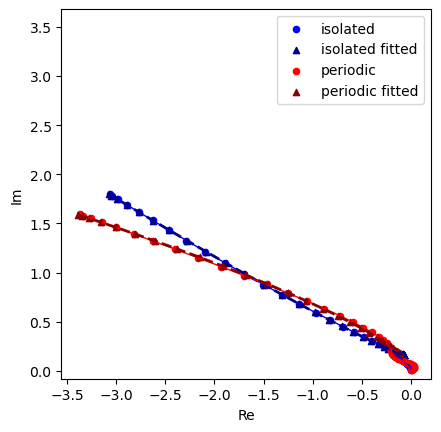

In [251]:
fitted_1 = Gaussian_fitting(results1, krange, [0.01, 1])
coeff1 = np.array(list(fitted_1.best_values.values()))
bg1 = coeff1[-2] + 1j*coeff1[-1]
recover_1 = Gaussian_function(krange, *coeff1)
fitted_2 = Gaussian_fitting(results2, krange, [0.01, 1])
coeff2 = np.array(list(fitted_2.best_values.values()))
recover_2 = Gaussian_function(krange, *coeff2)
bg2 = coeff2[-2] + 1j*coeff2[-1]
plt.plot(np.real(results1), np.imag(results1), color='b', linewidth=1)
plt.scatter(np.real(results1), np.imag(results1), color='b', s=20, label="isolated")
plt.plot(np.real(recover_1), np.imag(recover_1), '--', color='darkblue', linewidth=2)
plt.scatter(np.real(recover_1), np.imag(recover_1), marker="^", color='darkblue', s=20, label="isolated fitted")
plt.plot(np.real(results2), np.imag(results2), color='r', linewidth=1)
plt.scatter(np.real(results2), np.imag(results2), color='r', s=20, label="periodic")
plt.plot(np.real(recover_2), np.imag(recover_2), '--', color='darkred', linewidth=2)
plt.scatter(np.real(recover_2), np.imag(recover_2), marker="^", color='darkred', s=20, label="periodic fitted")
plt.xlabel("Re")
plt.ylabel("Im")
plt.legend()
plt.axis("square")
plt.show()

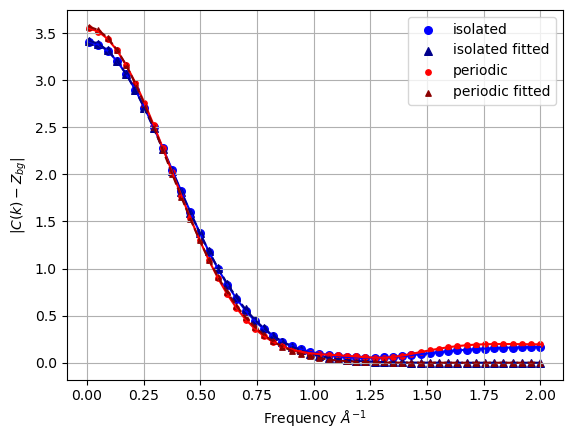

In [252]:
plt.plot(krange, np.abs(results1-bg1), color='b')
plt.scatter(krange, np.abs(results1-bg1), color='b', s=30, label="isolated")
plt.plot(krange, np.abs(recover_1-bg1), '--', color='darkblue')
plt.scatter(krange, np.abs(recover_1-bg1), color='darkblue', marker='^',s=30, label="isolated fitted")
#plt.show()
plt.plot(krange, np.abs(results2-bg2), color='r')
plt.scatter(krange, np.abs(results2-bg2), color='r', s=15, label='periodic')
plt.plot(krange, np.abs(recover_2-bg2), '--', color='darkred')
plt.scatter(krange, np.abs(recover_2-bg2), color='darkred', marker='^',s=15, label='periodic fitted')
plt.legend()
plt.xlabel(r"Frequency $\AA^{-1}$")
plt.ylabel(r"|$C(k)-Z_{bg}$|")
plt.grid()
plt.show()